<a href="https://colab.research.google.com/github/jwoo428/class/blob/main/20230301/%EC%9D%B4%EC%A4%80%EC%9A%B0_%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_2_1_%ED%9B%88%EB%A0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%99%80_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 훈련 세트와 테스트 세트

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 훈련 세트와 테스트 세트

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

zip문법으로 무게와 길이를 묶음

* 이때 하나의 데이터를 샘플이라고 부름

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [4]:
print(fish_data[4])

[29.0, 430.0]


In [6]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [7]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [8]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


#처음 부터 35까지의 데이터를 훈련데이터로 설정, 나머지 14개의 데이터를 테스트데이터로 설정했다

In [9]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

##여기서 문제점은 훈련데이터는 모두 도미로 이루어져 있고 테스트 데이터는 모두 빙어로 이루어져 있다는 점이다.

* 모두 도미인 곳 속에서 빙어를 찾으려고 하니 제대로된 정확도를 낼수가 없을 것이다.

In [10]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

#즉 훈련데이터는 골고루 섞이게 만들어야한다

## 넘파이

In [11]:
import numpy as np

* 파이썬 리스트를 넘파이 배열로 바꾸기

In [12]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [13]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


* 배열의 크기를 알려주는 shape속성

In [14]:
print(input_arr.shape)

(49, 2)


* 무작위로 인덱스 섞기

In [15]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

* 섞인 인덱스

In [16]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [17]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


* 35개를 훈련데이터로 설정

In [20]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [21]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


* 나머지 14개를 테스트데이터로 설정

In [23]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

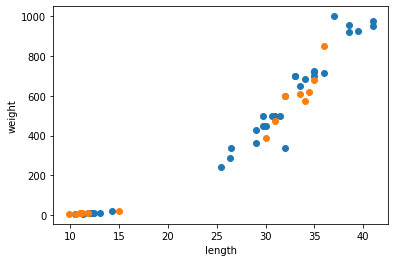

In [24]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램

In [25]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [26]:
kn.score(test_input, test_target)

1.0

In [27]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [28]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])